In [16]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder



%matplotlib inline 

In [2]:
csv_file_path = 'Base.csv'

#csv into pandas dataframe
data = pd.read_csv(csv_file_path)

#print(data.head(10))

#check for missing values in each col 
missing_value = data.isnull().sum()

#show me the col with missing val 
print(missing_value[missing_value>0])

print(data.dtypes)

Series([], dtype: int64)
fraud_bool                            int64
income                              float64
name_email_similarity               float64
prev_address_months_count             int64
current_address_months_count          int64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
payment_type                         object
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
employment_status                    object
credit_risk_score                     int64
email_is_free                         int64
housing_status                       object
phone_home_valid                      int64
phone_mobile_valid                    int64
bank_months_count                     int64
has_oth

In [3]:

col_names = data.columns.tolist()
continuous_cols = []
discrete_cols = []
for col in col_names:
    unique_value = data[col].unique()
    num_unique_values = len(unique_value)
    if num_unique_values > len(data) / 2:
        continuous_cols.append((col, "continuous"))
    else:
        discrete_cols.append((col, "discrete"))
# Create a DataFrame from the results
result_df = pd.DataFrame(continuous_cols + discrete_cols, columns=["Column Name", "Type"])

print(result_df)


                         Column Name        Type
0              name_email_similarity  continuous
1                 days_since_request  continuous
2             intended_balcon_amount  continuous
3                        velocity_6h  continuous
4                       velocity_24h  continuous
5                        velocity_4w  continuous
6          session_length_in_minutes  continuous
7                         fraud_bool    discrete
8                             income    discrete
9          prev_address_months_count    discrete
10      current_address_months_count    discrete
11                      customer_age    discrete
12                      payment_type    discrete
13                      zip_count_4w    discrete
14              bank_branch_count_8w    discrete
15  date_of_birth_distinct_emails_4w    discrete
16                 employment_status    discrete
17                 credit_risk_score    discrete
18                     email_is_free    discrete
19                  

##EDA


In [4]:
#identify categorical var
cat_vars = []
for col in data.columns:
    if data[col].dtype == 'object' or data[col].nunique()<10:
        cat_vars.append(col)
print("categorical var :", cat_vars)

categorical var : ['fraud_bool', 'income', 'customer_age', 'payment_type', 'employment_status', 'email_is_free', 'housing_status', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'source', 'device_os', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count', 'month']


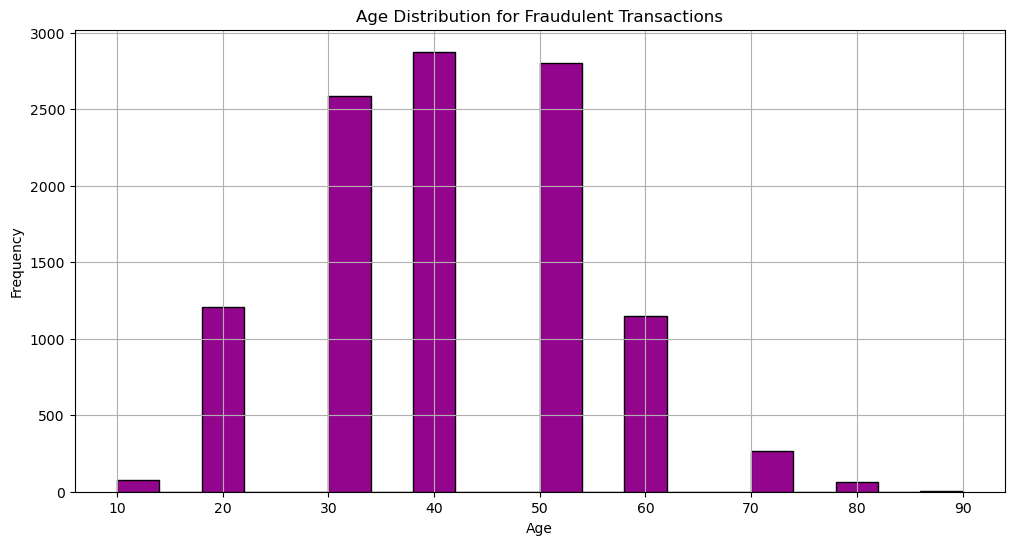

In [5]:
# Filter data for fraud occurrences
fraud_data = data[data['fraud_bool'] == 1]

# Create a histogram of age frequencies for fraud occurrences
plt.figure(figsize=(12, 6))
plt.hist(fraud_data['customer_age'], bins=20, color='#94058E', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution for Fraudulent Transactions')
plt.grid(True)
plt.show()

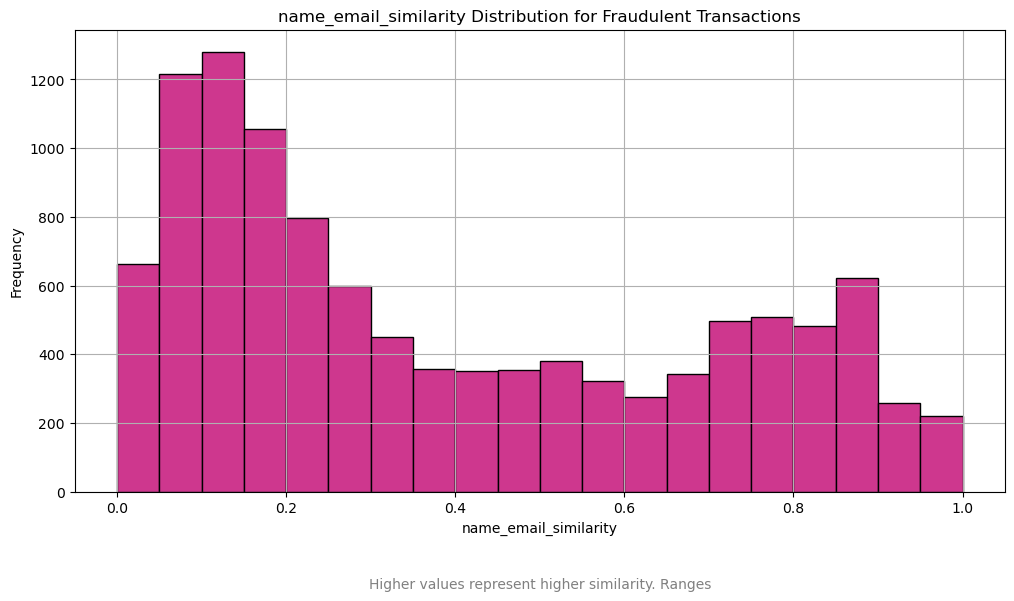

In [6]:
# Filter data for fraud occurrences
fraud_data = data[data['fraud_bool'] == 1]

# Create a histogram of age frequencies for fraud occurrences
plt.figure(figsize=(12, 6))
plt.hist(fraud_data['name_email_similarity'], bins=20, color='#CE378E', edgecolor='black')
plt.xlabel('name_email_similarity')
plt.ylabel('Frequency')
plt.title('name_email_similarity Distribution for Fraudulent Transactions')
plt.grid(True)

comment = 'Higher values represent higher similarity. Ranges'
plt.text(0.5, -0.2, comment, ha='center', va='center', transform=plt.gca().transAxes, fontsize=10, color='gray')


plt.show()

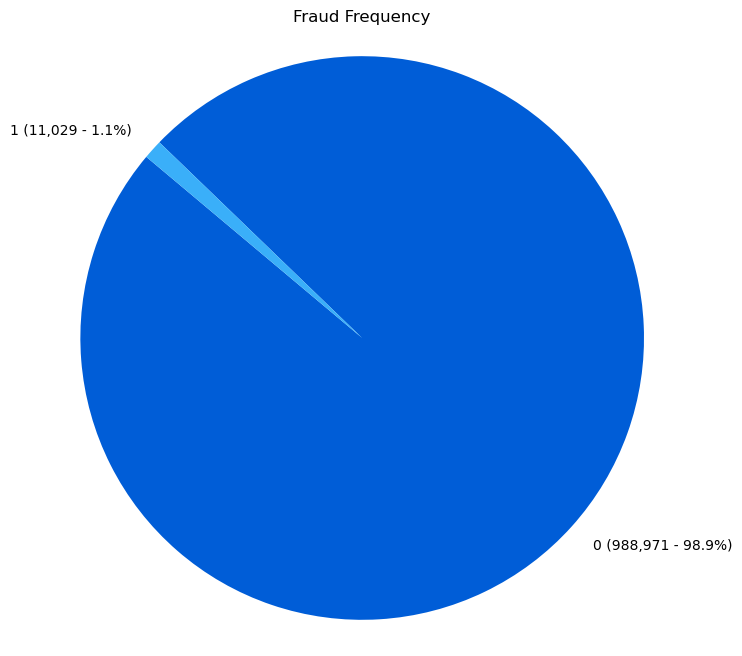

In [7]:
# Group data by 'fraud' and calculate frequency
fraud_frequency = data['fraud_bool'].value_counts()

# Create a pie plot
plt.figure(figsize=(8, 8))
plt.pie(fraud_frequency, labels=[f"{label} ({value:,} - {percentage:.1f}%)"
                                 for label, value, percentage in zip(fraud_frequency.index, fraud_frequency, (fraud_frequency / fraud_frequency.sum()) * 100)],
        colors=["#005DD7", "#3AAFF9"], startangle=140, autopct=None)
plt.title('Fraud Frequency')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [8]:
# Calculate IQR for each column
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1

# Identify outliers for each column
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

# Calculate the percentage of outliers for each column
percentage_outliers = (outliers.sum() / data.shape[0]) 

print(percentage_outliers)

/tmp/ipykernel_8746/2781650823.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
/tmp/ipykernel_8746/2781650823.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)
/tmp/ipykernel_8746/2781650823.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))


bank_branch_count_8w                0.175243
bank_months_count                   0.000000
credit_risk_score                   0.008729
current_address_months_count        0.041001
customer_age                        0.001373
date_of_birth_distinct_emails_4w    0.009734
days_since_request                  0.094834
device_distinct_emails_8w           0.031933
device_fraud_count                  0.000000
device_os                           0.000000
email_is_free                       0.000000
employment_status                   0.000000
foreign_request                     0.025242
fraud_bool                          0.011029
has_other_cards                     0.222988
housing_status                      0.000000
income                              0.000000
intended_balcon_amount              0.222702
keep_alive_session                  0.000000
month                               0.000000
name_email_similarity               0.000000
payment_type                        0.000000
phone_home

/tmp/ipykernel_8746/3033986129.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


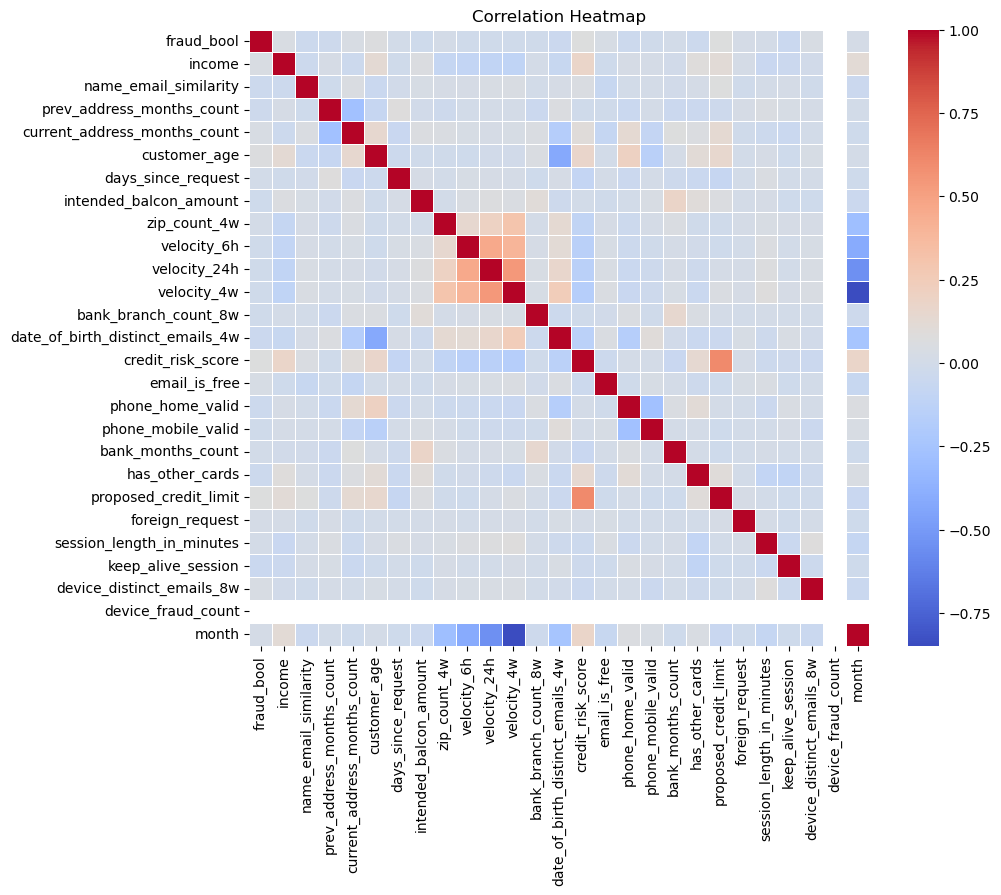

In [9]:
# Compute the correlation matrix
correlation_matrix = data.corr()
# Set up the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


In [18]:
# Create a copy of the data for preprocessing
data_preprocessed = data.copy()

# Initialize LabelEncoder for categorical columns
label_encoder = LabelEncoder()

# Iterate through categorical columns and apply label encoding
for column in data_preprocessed.select_dtypes(include=['object']):
    data_preprocessed[column] = label_encoder.fit_transform(data_preprocessed[column])

In [19]:
# Initialize t-SNE model
tsne = TSNE(n_components=2, random_state=42)

# Fit t-SNE to the data
reduced_data = tsne.fit_transform(data_preprocessed)

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=data['target_column'], cmap='rainbow')
plt.title('t-SNE Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()